# What I learned about async and asyncio
I wanted to learn another method besides **multiprocessing** to do many things at the same time. This isn't to say that async is able to do two things at once. Instead, the program can choose to pass over anything that takes a long time. 

A great example of this is 2-factor authentication(2FA). When you get sent a text to prove who you are, the company who sent you the text starts up an "async" task or asyncronious task. This task is simply just waiting for the confirmation that you entered the correct numbers and then it lets you into your account. 

Up until the point where a computer program needs to do something, it would be extremely wasteful to have a computer sit waiting while not doing anything else. This is why we invented __[coroutines](https://en.wikipedia.org/wiki/Coroutine#:~:text=Coroutines%20are%20computer%20program%20components,iterators%2C%20infinite%20lists%20and%20pipes.)__.

To quote:
> _Coroutines are computer program components that generalize subroutines for non-preemptive multitasking, by allowing execution to be suspended and resumed. Coroutines are well-suited for implementing familiar program components such as cooperative tasks, exceptions, event loops, iterators, infinite lists and pipes._

I'm going to write an example program where we simulate a 2FA system waiting for people to enter their private code. I'm not going to create the actual texting/emailing system for that in this write-up as those topics deserve their own Jupyter notebook. 
<br>
<br>

### Write-up Conclusion:
If you have code in your program that is just waiting for a result async is one of the best solutions you can find. 
<br>
<br>


## Example Program:
Here are our imports:

In [217]:
import asyncio
import random
import time

__[asyncio](https://docs.python.org/3/library/asyncio.html)__
-  asyncio is a library to write concurrent code using the async/await syntax 

__[random](https://docs.python.org/3/library/random.html?highlight=random#module-random)__

-  This module implements pseudo-random number generators

__[time](https://docs.python.org/3/library/asyncio.html)__
-  This module provides various time-related functions.


### The async function were going to use to simulate waiting for a user
Now we need to define a function that takes time for it to complete just like what the user will be doing for us. This is the function we will use to pretend like we are waiting for users below.

Each time the function is called it:
1. **Prints to console** so we can see it started
2. Assign's a random wait time between **5 and 15 seconds**
3. **Waits** that time
4. **Return's** the time that was waited so we can measure how long it was

In [218]:
async def simulate_auth_wait_time():
    '''We are basically waiting a random amount of time between 5 to 15 seconds and returning that 
    amount as an integer'''
    # 1. output
    print("waiting for user to enter auth code...")
    # 2. Assigning a wait time to a random int between 5 - 15 (ex : 7)
    wait_time = random.randrange(5, 15)
    # 3. wait for that time
    await asyncio.sleep(wait_time)
    # 4. return the wait time to the main function's wait_time list
    return wait_time

### Some quick notes about the function above:

- You may of noticed it started with **async**. Async functions are only capable of working with other async functions.
- Whenever you use an async function, you have to **await** them. It basically calls their api to start the task and wait for its completion.
- This is a very basic wait function that doesn't account for people not entering their codes at all. Normally, in circumstances where a user doesn't reply, the async event will raise a **timeout** error. I usually just use the exception itself to let the user know they ran out of time. This can be done through proper __[exception handling](https://docs.python.org/3/tutorial/errors.html)__.

## The main event loop:
The function below does 4 things every time it's called:
1. Captures a **start time** in a variable
2. Uses a list comprehension to make **5 async tasks**
    - These tasks are us **waiting** for a user response from an **email/text**
3. Gathers the individual wait times of the tasks in a list called **wait_times**
4. Prints the data in a readable format.

In [219]:
from platform import freedesktop_os_release


async def main():
    # 1. Starts a timer using time module
    start_time = time.time()
    # 2. We are using a list comprehension here to make 20 auth_wait_time instances
    tasks = [asyncio.create_task(simulate_auth_wait_time()) for i in range(0,10)] #change the 5 to add tasks
    # 3. Gathering the results (this means we are waiting for them all to finish before continuing)
    wait_times = await asyncio.gather(*tasks)
    
    print('\n') # new line for space between waiting and finished tasks
    
    # 4. for waited time in each task
    for waited in wait_times:
        print(f"Finished Task after **{waited}** seconds")
        
    print(f"\n\nThis should normally take {sum(wait_times)} seconds to complete but"+
        f" we are doing this asynchronous so it actually took\n"+
        " --- TOTAL PROGRAM TIME: %s seconds ---" % (time.time() - start_time)) #figuring out how long the program took

    # Chart stuff 
    import numpy as np
    import matplotlib.pyplot as plt
    x = [i+1 for i in range(len(wait_times))]
    y = [i for i in wait_times]
    plt.bar(x, y)
    plt.xlabel("Tasks")
    plt.ylabel("Seconds")
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.yticks(np.arange(0, max(y)+1, 1.0))
    plt.show()

## Entry Point:
It's always good to use the **if \_\_name\_\_ == '\_\_main\_\_':** format to let the reader know that this python file is supposed to be run and is not a supporting module. 

Normally, instead of writing **await main()** I would have used **asyncio.run(main())** but Jupyter Notebooks are already an async based system. So I don't need to call run in this circumstance and instead can just use the standard **await** to start the main function.


waiting for user to enter auth code...
waiting for user to enter auth code...
waiting for user to enter auth code...
waiting for user to enter auth code...
waiting for user to enter auth code...
waiting for user to enter auth code...
waiting for user to enter auth code...
waiting for user to enter auth code...
waiting for user to enter auth code...
waiting for user to enter auth code...


Finished Task after **7** seconds
Finished Task after **12** seconds
Finished Task after **8** seconds
Finished Task after **7** seconds
Finished Task after **8** seconds
Finished Task after **14** seconds
Finished Task after **13** seconds
Finished Task after **11** seconds
Finished Task after **8** seconds
Finished Task after **6** seconds


This should normally take 94 seconds to complete but we are doing this asynchronous so it actually took
 --- TOTAL PROGRAM TIME: 14.01169466972351 seconds ---


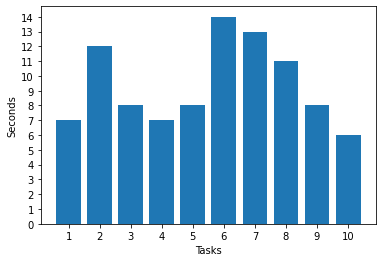

In [220]:
if __name__ == '__main__':
    await main()

## This is the output of the program:
1. You can see that the program started 5 tasks where we pretend to wait for users to input their auth code.
<br>

2. Then after **all** the tasks are complete, we gather them and display how long each one took to finish.
<br>
3. The last thing is showing how long the program would actually take to complete.

<br>

You could of launched 10,000 tasks and it still would of only taken around 15 seconds. I only used 5 in this example for read-ability. I  actually did this for giggles and with 10,000 tasks it would of taken **95,108 seconds** but instead was still **14.28 seconds**.

<br>
Feel free to change numbers however you want and try out different things in this notebook.
<br>
<br>
<br>

### So what should be taken from this?
If you have code in your program that is just waiting for a result async is one of the best solutions you can find. 